<a href="https://www.kaggle.com/code/yosefibrahim/final-project-003?scriptVersionId=129987104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.8 MB/s eta 0:00:00


In [3]:
import os
from pyunpack import Archive
import shutil
if not os.path.exists('/kaggle/working/train/'):
    os.makedirs('/kaggle/working/train/')
Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/train/')


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


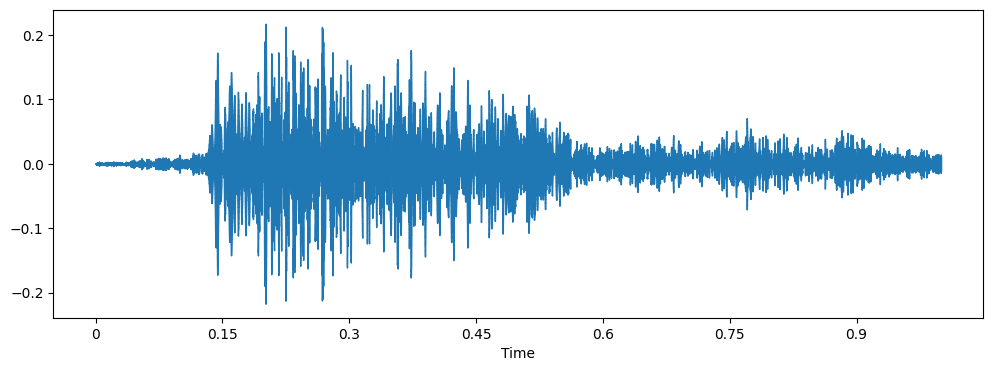

In [5]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate)

In [6]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')#data,samples taken per second
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [ 0.00035192  0.00023077  0.0001062  ... -0.0070652  -0.00622757
 -0.00346543]
number of Data :  22050
sampling_rate :  22050


# Desired sampling rate.

In [7]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/327289eb_nohash_0.wav',sr=None)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-0.00024414  0.00042725  0.00094604 ... -0.0005188  -0.00033569
 -0.00106812]
number of Data :  14861
sampling_rate :  16000


In [8]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/b93528e3_nohash_0.wav',sr=8000)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-4.5823297e-04 -6.2076072e-04 -1.9502838e-04 ... -5.1036617e-04
 -4.4072035e-04 -6.5347107e-05]
number of Data :  8000
sampling_rate :  8000


In [9]:
ms.use('seaborn-muted')

/tmp/ipykernel_20/1416757634.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [10]:
words=os.listdir('/kaggle/working/train/train/audio')
words

['two',
 'go',
 'seven',
 'marvin',
 'on',
 'sheila',
 'yes',
 'wow',
 'four',
 'bird',
 'house',
 'bed',
 'cat',
 'no',
 'three',
 'left',
 'up',
 'nine',
 'happy',
 'dog',
 'tree',
 'right',
 'eight',
 'stop',
 '_background_noise_',
 'down',
 'off',
 'six',
 'zero',
 'five',
 'one']

import matplotlib.pyplot as plt
import numpy as np
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

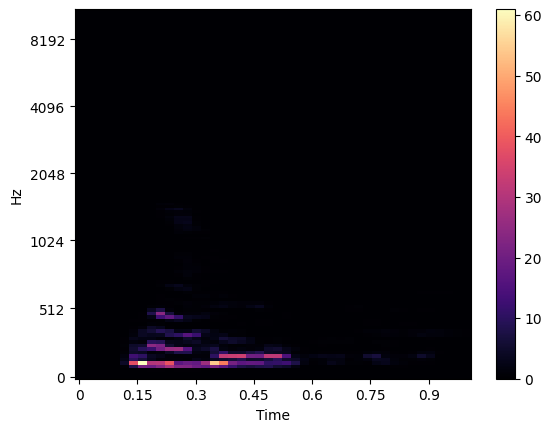

In [11]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
melspec=librosa.feature.melspectrogram(y=data,sr=sampling_rate)
plt.figure()
librosa.display.specshow(melspec,y_axis='mel',x_axis='time')
plt.colorbar()

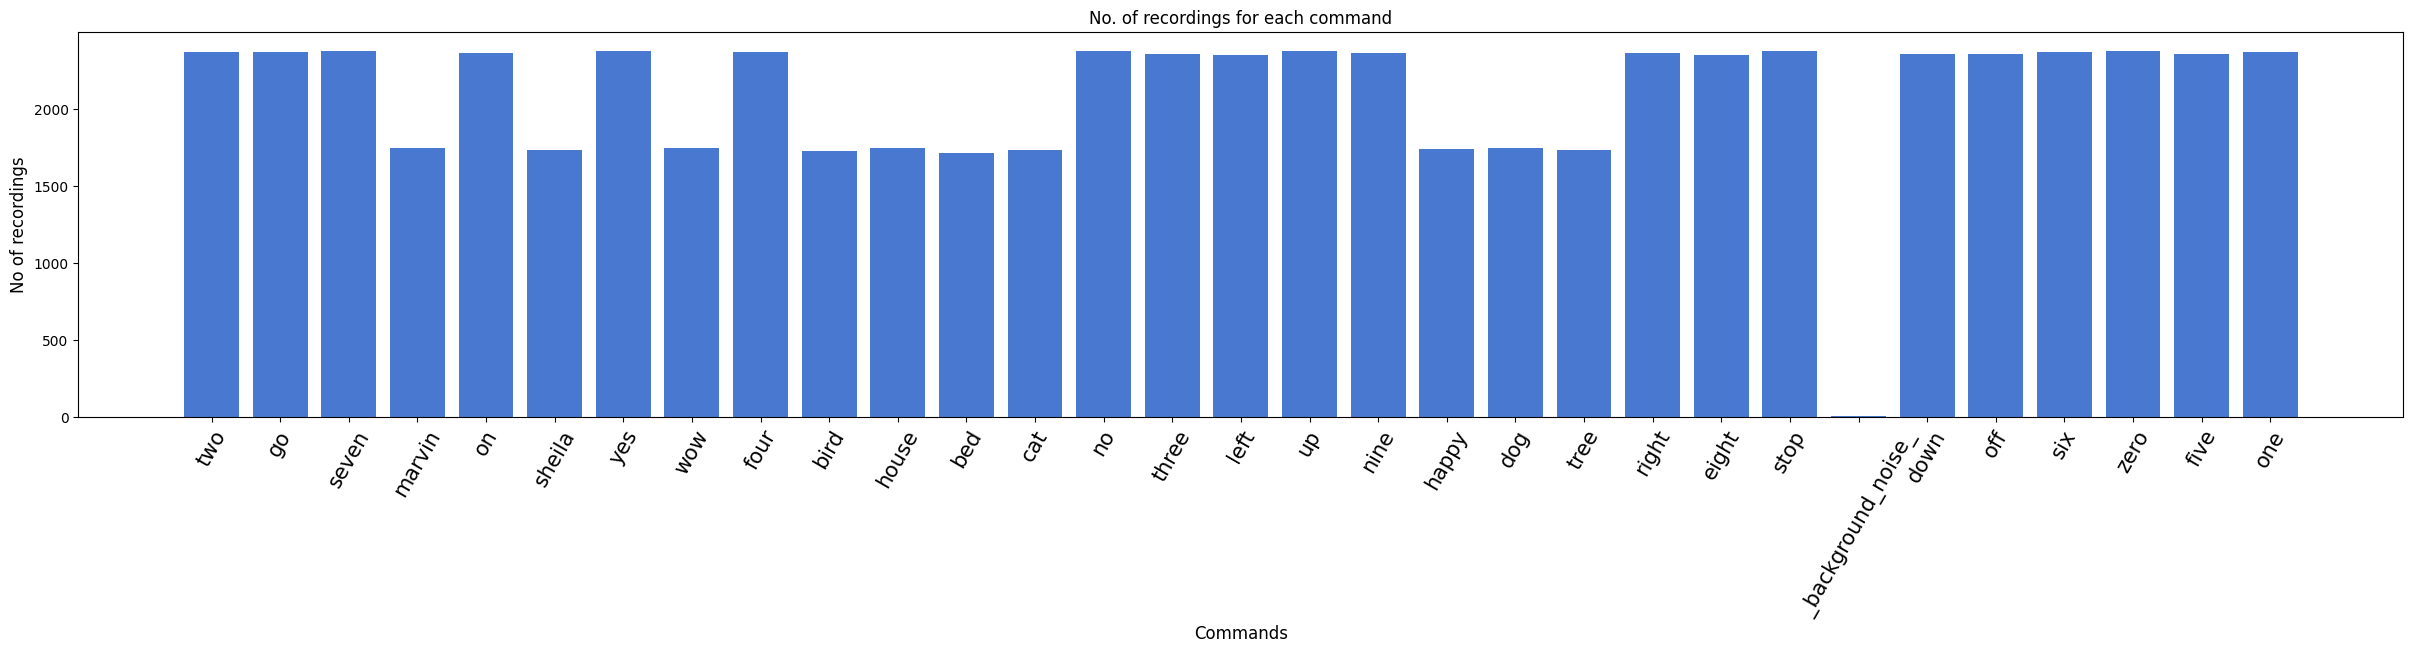

In [12]:
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [13]:
all_wave = []
all_label = []

for label in labels[:6]:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

two
go
seven
marvin
on
sheila


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [15]:
classes

['go', 'marvin', 'on', 'seven', 'sheila', 'two']

In [16]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [17]:
all_wave[0:5]

[array([-0.00733586,  0.00530171,  0.00415991, ..., -0.02455683,
        -0.02300046, -0.03557259], dtype=float32),
 array([-9.08679795e-06, -1.00663165e-05, -5.49458200e-05, ...,
        -1.92547977e-05,  6.03780063e-05,  5.62051246e-05], dtype=float32),
 array([ 1.3803299e-05,  2.2306849e-05,  6.3721651e-05, ...,
        -2.3205290e-04, -2.2582116e-04, -2.6055679e-04], dtype=float32),
 array([ 8.1300735e-05,  1.9958126e-04,  2.2040447e-05, ...,
        -1.1916246e-04,  1.2861454e-04, -3.6799305e-04], dtype=float32),
 array([-2.2200496e-05, -2.5761226e-05, -6.9980000e-05, ...,
         1.2977768e-04, -7.1654940e-06, -5.9112499e-06], dtype=float32)]

In [18]:
all_wave = np.array(all_wave).reshape(-1,8000)

In [19]:
all_wave.shape

(11672, 8000)

In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
x_te, x_val, y_te, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=777,shuffle=True)

In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 

In [23]:
history=model.fit(x_tr, y_tr ,epochs=20,callbacks=es,  batch_size=32, validation_data=(x_val,y_val))

Epoch 1/20
292/292 [==============================] - 30s 97ms/step - loss: 1.8192 - accuracy: 0.2389 - val_loss: 1.3606 - val_accuracy: 0.4315
Epoch 2/20
292/292 [==============================] - 28s 95ms/step - loss: 1.2161 - accuracy: 0.5042 - val_loss: 1.0018 - val_accuracy: 0.6267
Epoch 3/20
292/292 [==============================] - 28s 96ms/step - loss: 0.9412 - accuracy: 0.6399 - val_loss: 0.7798 - val_accuracy: 0.7175
Epoch 4/20
292/292 [==============================] - 28s 97ms/step - loss: 0.7715 - accuracy: 0.7139 - val_loss: 0.6703 - val_accuracy: 0.7671
Epoch 5/20
292/292 [==============================] - 28s 97ms/step - loss: 0.6510 - accuracy: 0.7689 - val_loss: 0.6825 - val_accuracy: 0.7551
Epoch 6/20
292/292 [==============================] - 28s 96ms/step - loss: 0.5522 - accuracy: 0.8069 - val_loss: 0.5192 - val_accuracy: 0.8279
Epoch 7/20
292/292 [==============================] - 28s 95ms/step - loss: 0.5140 - accuracy: 0.8195 - val_loss: 0.5646 - val_accuracy:

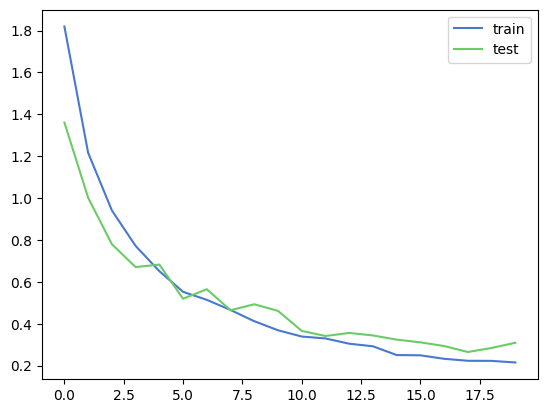

In [24]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [25]:
from keras.models import load_model
model.save('best_model.hdf5')

In [26]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000))
    index=np.argmax(prob[0])
    return classes[index]

In [27]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: sheila
1/1 [==============================] - 0s 156ms/step
Text: sheila


In [28]:
predictions = model.predict(x=x_te, verbose=0)

In [29]:
print(y_te.shape,predictions.shape)

(1167, 31) (1167, 31)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_te.argmax(axis=1),predictions.argmax(axis=1))
confusion_matrix
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       210
           1       0.98      0.91      0.94       158
           2       0.92      0.93      0.93       210
           3       0.95      0.90      0.92       217
           4       0.91      0.88      0.90       158
           5       0.81      0.90      0.85       214

    accuracy                           0.91      1167
   macro avg       0.91      0.91      0.91      1167
weighted avg       0.91      0.91      0.91      1167



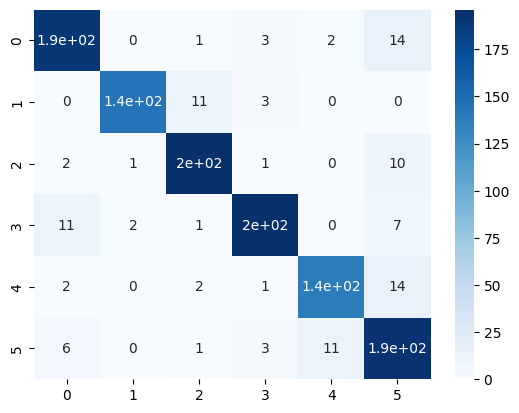

In [31]:
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()